In [32]:
import utils 
import transformer 
import bar_distribution
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import prior 
matplotlib.use('TkAgg')
%matplotlib inline
import main
import importlib
device = torch.device("cuda")
importlib.reload(utils)
importlib.reload(transformer)
importlib.reload(bar_distribution)
importlib.reload(main)
importlib.reload(prior)
import random
from sklearn.cluster import KMeans
#####################################################################################################################################################
import warnings 
warnings.filterwarnings("ignore")

In [26]:
print(f"Using device: {torch.cuda.get_device_name(torch.cuda.current_device())}")
device = torch.device("cuda")
d_model, nhead, nhid, nlayers = 256, 4, 512, 4
seq_len = 200
num_epochs = 500
lr = 0.001
num_outputs = 5
batch_size = 500
in_features = 2
noise = False
warm_up_epochs = 5
model = transformer.Transformer(d_model, nhead, nhid, nlayers,in_features=in_features, buckets_size=num_outputs).to(device)
print(f"total params:{sum(p.numel() for p in model.parameters())}")
#criterion = bar_distribution.FullSupportBarDistribution(bar_distribution.get_bucket_limits(num_outputs=num_outputs,ys=y))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
scheduler = utils.get_cosine_schedule_with_warmup(optimizer, warm_up_epochs, num_epochs)
model.criterion = criterion

model.load_state_dict(torch.load("C:\\Users\\prajb\\OneDrive\\Documents\\TU Delft CSE Masters Y2\\Thesis Projects\\PFN clustering\\saved_model.pt", weights_only=True))
model.eval() 

Using device: Quadro P1000
total params:2111493


Transformer(
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (linear1): Linear(in_features=256, out_features=512, bias=True)
        (dropout): Dropout(p=0, inplace=False)
        (linear2): Linear(in_features=512, out_features=256, bias=True)
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0, inplace=False)
        (dropout2): Dropout(p=0, inplace=False)
      )
    )
    (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  )
  (decoder): Linear(in_features=256, out_features=5, bias=True)
  (linear_x): Sequential(
    (0): Normalize()
    (1): Linear(in_features=2, out_features=256, bias=True)
  )
  (linear_y): Linear(in_features=1, out_feature

In [29]:
%matplotlib inline
temp_batch_size = 10
seq_len = 100
train_X, train_Y, y_target, batch_classes = prior.sample_clusters(batch_size=temp_batch_size,seq_len=seq_len,num_classes=num_outputs, kmeans=True,std_variation=True)
print("")

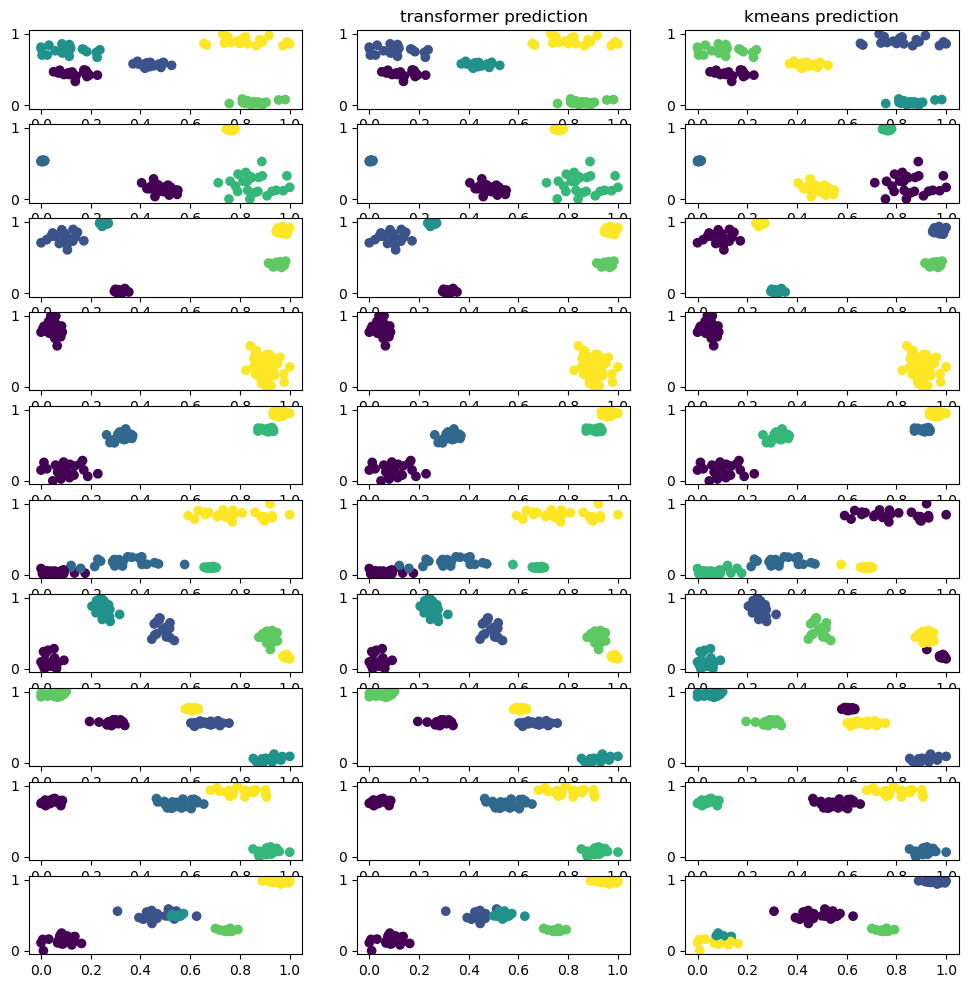

In [30]:
num_points = 50

train_x = train_X[:num_points]
X_total = torch.cat((train_x, train_X), dim=0) 
# # Set up grid for subplots
fig, axes = plt.subplots(temp_batch_size, 3, figsize=(12, 12)) 
axes = axes.flatten() 
for batch_index in range(temp_batch_size):
    train_x = train_X[:, batch_index]
    train_y = train_Y[:, batch_index] 
    axes[3 * batch_index].scatter(train_x[:, 0].cpu().numpy() , train_x[:, 1].cpu().numpy() , c=train_y.cpu().numpy())
    logits = model(X_total[:, batch_index], num_points)
    k_labels = utils.k_means(train_x, batch_classes[batch_index])
    predictions = torch.argmax(logits, dim=1)
    axes[3 * batch_index +1].scatter(train_x[:, 0].cpu().numpy() , train_x[:, 1].cpu().numpy() , c=predictions.cpu().numpy())
    axes[3 * batch_index +2].scatter(train_x[:, 0].cpu().numpy() , train_x[:, 1].cpu().numpy() , c=k_labels)
axes[1].set_title(f"transformer prediction")
axes[2].set_title(f"kmeans prediction")
plt.show()

In [3]:
print(f"Using device: {torch.cuda.get_device_name(torch.cuda.current_device())}")
device = torch.device("cuda")
d_model, nhead, nhid, nlayers = 256, 4, 512, 4
seq_len = 200
num_epochs = 500
lr = 0.001
num_outputs = 5
batch_size = 500
in_features = 2
noise = False
warm_up_epochs = 5
model = transformer.Transformer(d_model, nhead, nhid, nlayers,in_features=in_features, buckets_size=num_outputs).to(device)
print(f"total params:{sum(p.numel() for p in model.parameters())}")
model.load_state_dict(torch.load("C:\\Users\\prajb\\OneDrive\\Documents\\TU Delft CSE Masters Y2\\Thesis Projects\\PFN clustering\\saved_model.pt", weights_only=True))
model.eval() 

Using device: Quadro P1000
total params:2111493


Transformer(
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (linear1): Linear(in_features=256, out_features=512, bias=True)
        (dropout): Dropout(p=0, inplace=False)
        (linear2): Linear(in_features=512, out_features=256, bias=True)
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0, inplace=False)
        (dropout2): Dropout(p=0, inplace=False)
      )
    )
    (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  )
  (decoder): Linear(in_features=256, out_features=5, bias=True)
  (linear_x): Sequential(
    (0): Normalize()
    (1): Linear(in_features=2, out_features=256, bias=True)
  )
  (linear_y): Linear(in_features=1, out_feature

In [22]:
%matplotlib inline
temp_batch_size = 10
seq_len = 100
train_X, train_Y, y_target, batch_classes = prior.sample_clusters(batch_size=temp_batch_size,seq_len=seq_len,num_classes=num_outputs, kmeans=True, std_variation=True)
print("")

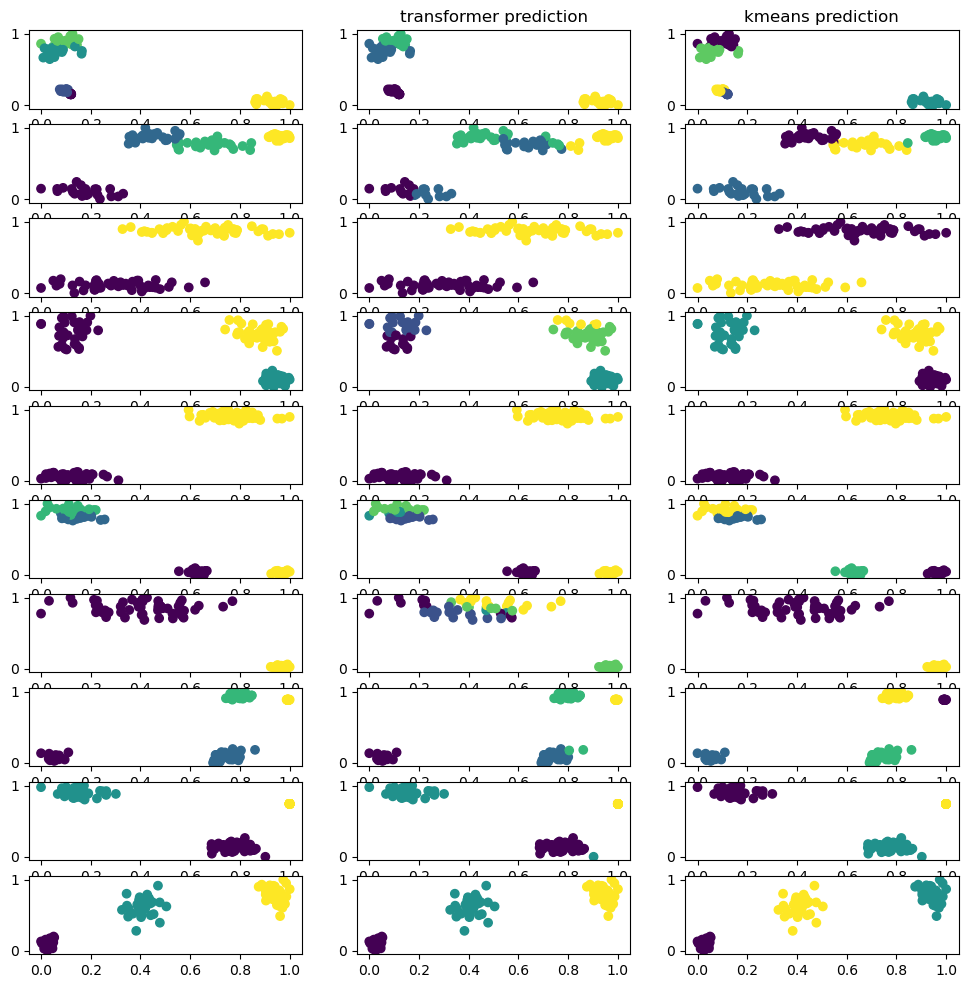

In [23]:
num_points = 50

train_x = train_X[:num_points]
X_total = torch.cat((train_x, train_X), dim=0) 
# # Set up grid for subplots
fig, axes = plt.subplots(temp_batch_size, 3, figsize=(12, 12)) 
axes = axes.flatten() 
for batch_index in range(temp_batch_size):
    train_x = train_X[:, batch_index]
    train_y = train_Y[:, batch_index] 
    axes[3 * batch_index].scatter(train_x[:, 0].cpu().numpy() , train_x[:, 1].cpu().numpy() , c=train_y.cpu().numpy())
    logits = model(X_total[:, batch_index], num_points)
    k_labels = utils.k_means(train_x, batch_classes[batch_index])
    predictions = torch.argmax(logits, dim=1)
    axes[3 * batch_index +1].scatter(train_x[:, 0].cpu().numpy() , train_x[:, 1].cpu().numpy() , c=predictions.cpu().numpy())
    axes[3 * batch_index +2].scatter(train_x[:, 0].cpu().numpy() , train_x[:, 1].cpu().numpy() , c=k_labels)
axes[1].set_title(f"transformer prediction")
axes[2].set_title(f"kmeans prediction")
plt.show()